# Running fastFMM directly in a IRkernel

In [1]:
library("fastFMM")
library("arrow") # need to use arrow for new feather format
library(dplyr)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [31]:
data <- read_feather("../../../trialexp_notebook_learning/xr_aborted_DA.feather")
head(data)

trial_id,animal_id,diff_bar_off_time,DA.1,DA.2,DA.3,DA.4,DA.5,DA.6,DA.7,⋯,DA.168,DA.169,DA.170,DA.171,DA.172,DA.173,DA.174,DA.175,zscored_diff_time,__index_level_0__
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,RE017,311,-1.6483561,-1.79559995,-0.61139331,-0.08431641,0.7015204,0.072317939,-0.13448525,⋯,1.6834741,1.9874941,1.3288911,2.27182243,1.58254133,1.4939447,1.7616112,2.4036608,-0.4290805,0
1,RE017,171,-3.8403475,-4.53472634,-4.17177101,-4.52963382,-3.9148567,-3.615064000,-3.07400048,⋯,-0.1021270,-0.7166210,-1.3219004,-1.69757234,-1.26668632,-0.1900444,0.3664063,1.6352960,-0.5064940,1
2,RE017,-344,-0.1945162,-0.06012844,0.56847022,0.84729263,0.6950855,-0.003256161,0.06081276,⋯,-0.9935430,-0.5904711,-1.0444645,-0.38876256,0.01710507,0.2710900,0.4206789,0.5538312,-0.7912650,2
3,RE017,455,0.1900403,0.46268879,0.07798145,-0.39522787,0.2744739,-0.346627783,-0.52497862,⋯,0.1087062,1.2075286,1.0504724,1.97403179,1.39151325,1.5997495,1.8014870,1.7707296,-0.3494552,3
10,RE017,252,2.6970251,1.79186228,1.44282085,1.57841417,1.1085968,0.470281825,-0.29014357,⋯,0.3339813,0.1802801,0.8147522,0.87106378,0.60891105,0.2114663,0.4654368,0.6367834,-0.4617048,10
11,RE017,-13,1.1885544,0.11506640,0.30805892,0.39213519,0.8610842,0.587754321,0.20896876,⋯,0.7091205,1.0672699,-0.1048729,0.05634769,-0.04759931,-0.2671561,-0.2783847,-0.2069284,-0.6082374,11


In [32]:
data_sel <- data %>% slice_sample(n = 4000)
# data_sel <- data

In [33]:
df <- as.data.frame(data_sel)
head(df)

,trial_id,animal_id,diff_bar_off_time,DA.1,DA.2,DA.3,DA.4,DA.5,DA.6,DA.7,⋯,DA.168,DA.169,DA.170,DA.171,DA.172,DA.173,DA.174,DA.175,zscored_diff_time,__index_level_0__
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,3355,TT013,-233,-0.04432186,-0.1888987,-0.2681992,-0.1052598,0.007580662,0.1194160,0.2782442,⋯,-0.2957787,-0.5444867,-0.3253769,0.42650151,0.43109465,0.77071714,0.4186596,0.02070417,-0.7298872,3355
2,13018,RE020,1448,1.26932730,-0.2421251,-0.3010183,0.1620610,-0.183938958,0.6885374,0.2088103,⋯,-1.5554921,-0.8027372,1.3986437,-1.16914294,-0.17648888,0.05494537,0.6449116,-1.57737749,0.1996276,13018
3,4475,TT013,-326,0.30882318,0.3388417,0.6462932,0.5837842,0.308964675,0.9689914,0.3744358,⋯,0.4082041,0.2932146,-0.1211319,0.52052603,0.58952987,-0.15845777,0.1164755,0.25171877,-0.7813119,4475
4,10903,RE021,-554,-0.30634948,-0.4237901,-0.4323299,-0.5583983,-1.106821943,-0.7986778,-0.6645823,⋯,-0.1718390,1.2902084,0.6383483,-0.03084994,0.65241243,0.38164376,1.1209783,0.98151408,-0.9073853,10903
5,14089,TT015,438,-1.00106960,-1.0142533,-0.3839540,0.3160529,-1.161028946,-2.2127791,-1.2825294,⋯,0.6397883,0.4539612,-0.3947795,-0.21820127,-0.02299789,-0.95448171,-0.6382234,-0.82900809,-0.3588554,14089
6,8527,RE022,-348,0.85458433,-0.1860746,-1.0798274,0.4898370,0.191762718,0.4518985,-0.0953215,⋯,-0.6298214,-0.2588216,-0.5291380,-0.18682264,-0.46907512,-0.95646013,-1.1392216,-0.80881590,-0.7934769,8527


Number of cores used for parallelization: 21



[1] "Step 1: Fit Massively Univariate Mixed Models"
[1] "Step 2: Smoothing"
[1] "Step 3: Inference (Analytic)"
[1] "Step 3.1: Preparation"
[1] "Step 3.1.1: Method of Moments Covariance Estimator Random Intercept"
[1] "Step 3.1.2: Smooth G"
[1] "Step 3.2: First step"
[1] "Step 3.2.1: First step"
[1] "Step 3.3: Second step"


Complete!
 - Use plot_fui() function to plot estimates.
 - For more information, run the command:  ?plot_fui



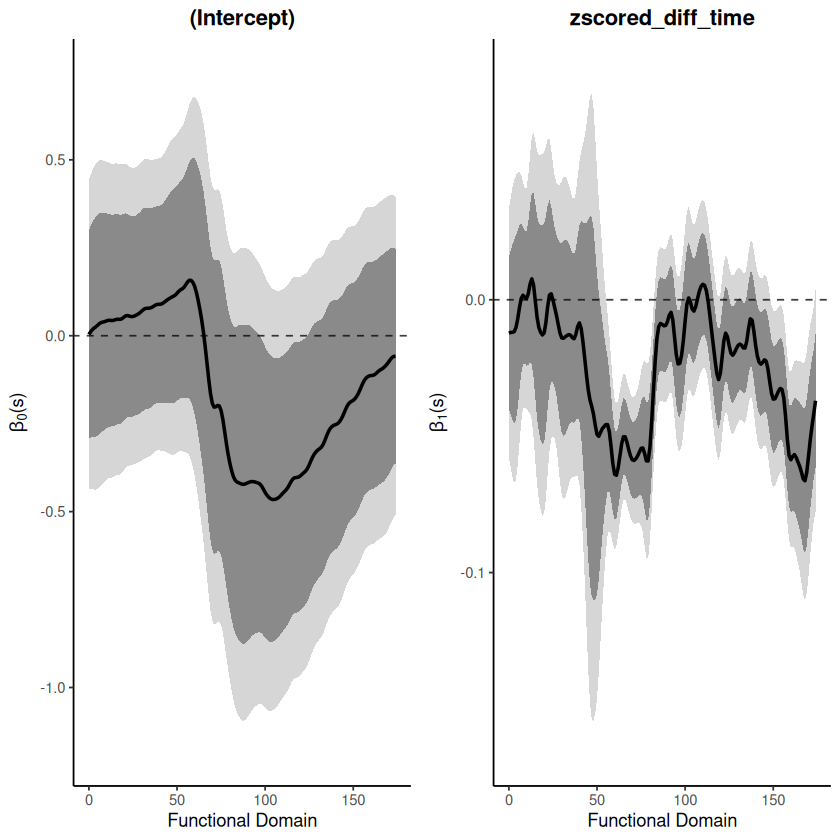

In [36]:
mod = fui(DA ~ zscored_diff_time + (1 | animal_id), data = df, parallel = TRUE) # fit random slope model
model_results = plot_fui(mod,  return = TRUE)

In [19]:
write.csv(model_results[["(Intercept)"]], 
          file = "beta0_DA.csv", 
          row.names = FALSE) 

# save CSV for beta1 (CS+/CS- effect)
write.csv(model_results[["cs"]], 
          file = "beta1_DA.csv", 
          row.names = FALSE) 

## Also do that for ACh

Number of cores used for parallelization: 21



[1] "Step 1: Fit Massively Univariate Mixed Models"
[1] "Step 2: Smoothing"
[1] "Step 3: Inference (Analytic)"
[1] "Step 3.1: Preparation"
[1] "Step 3.1.1: Method of Moments Covariance Estimator Random Intercept"
[1] "Step 3.1.2: Smooth G"
[1] "Step 3.2: First step"
[1] "Step 3.2.1: First step"
[1] "Step 3.3: Second step"


Complete!
 - Use plot_fui() function to plot estimates.
 - For more information, run the command:  ?plot_fui



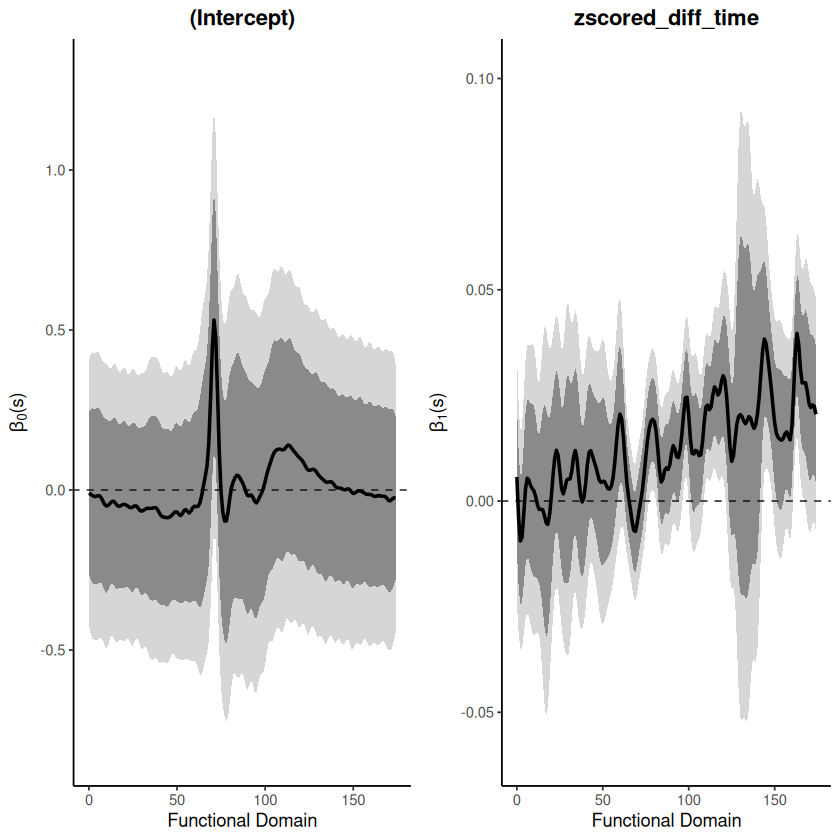

In [29]:
# Also do that for ACh
data <- read_feather("../../../trialexp_notebook_learning/xr_aborted_ACh.feather")
# data_sel <- data %>% slice_sample(n = 4000)
data_sel <- data
df <- as.data.frame(data_sel)

mod = fui(ACh ~ zscored_diff_time + (1 | animal_id), data = df, parallel = TRUE) # fit random slope model
model_results = plot_fui(mod,  return = TRUE)

In [30]:
write.csv(model_results[["(Intercept)"]], 
          file = "beta0_ACh.csv", 
          row.names = FALSE) 

# save CSV for beta1 (CS+/CS- effect)
write.csv(model_results[["cs"]], 
          file = "beta1_ACh.csv", 
          row.names = FALSE) 